# Pandas Lab Assignment - Diamonds

The following csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

Read the file and find the following:

1. Drop the unnamed column from the dataset once you read it  
2. The occurences of all unique colors of diamonds, bar chart of the same.     
3. Average price of each cut of diamond.  
4. Find the volume of every diamond and store it in a new column in the dataset. (volume = x*y*z)   
5. Histograms of Price and depths colums as two separate plots  
6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  
7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  
8. Which clarity(i.e the category) diamond has maximum mean depth?  
9. Find the diamond(i.e row) with minimum price per volume

In [1]:
import pandas as pd
df = pd.read_csv("./datasets/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- Drop the unnamed column from the dataset once you read it

In [2]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
datanew = df.drop(['Unnamed: 0'],axis = 1)
datanew.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- The occurences of all unique colors of diamonds, bar chart of the same.

In [9]:
datanew['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

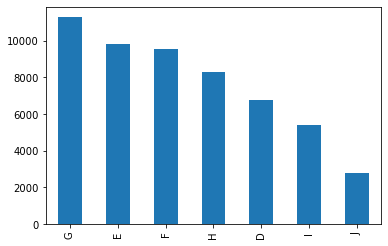

In [10]:
datanew['color'].value_counts().plot(kind = 'bar')

- Average price of each cut of diamond.

In [12]:
datanew.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
datanew['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [17]:
datapricecut=datanew[['cut','price']]
for name,value in datapricecut.groupby(['cut']):
    print("Average price of {0} is {1}".format(name,value['price'].mean()))

Average price of Fair is 4358.757763975155
Average price of Good is 3928.864451691806
Average price of Ideal is 3457.541970210199
Average price of Premium is 4584.2577042999055
Average price of Very Good is 3981.7598907465654


- Find the volume of every diamond and store it in a new column in the dataset. (volume = xyz)

In [18]:
datanew['volume'] = datanew['x']*datanew['y']*datanew['z']
datanew.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


- Histograms of Price and depths colums as two separate plots

(array([3.0000e+00, 0.0000e+00, 1.1000e+01, 2.6800e+02, 1.2078e+04,
        4.0363e+04, 1.1320e+03, 7.8000e+01, 4.0000e+00, 3.0000e+00]),
 array([43. , 46.6, 50.2, 53.8, 57.4, 61. , 64.6, 68.2, 71.8, 75.4, 79. ]),
 <a list of 10 Patch objects>)

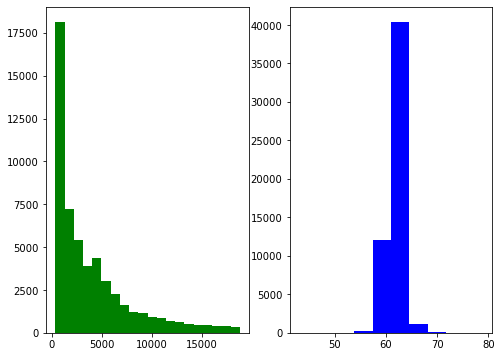

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.hist(datanew['price'],bins=20,color = 'g')

plt.subplot(1,2,2)
plt.hist(datanew['depth'],color = 'b')

- A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.

In [25]:
datanew.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


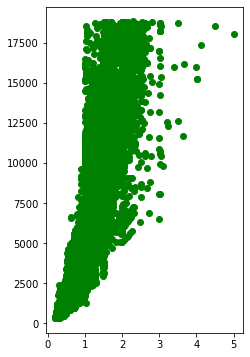

In [28]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.scatter(datanew['carat'],datanew['price'],color = 'g')

In [ ]:
dn['price']/dn['volume']
.min